In [1]:
import matplotlib.pyplot as plt

# We report results on 2, 5, 10, 25, 50, and 100 permutedMNIST tasks
num_tasks = [2, 5, 10, 25, 50, 100]
x_labels = [None, None, "10", None, None, "100"]

# Results with an Active Dendrites Network (All numbers are averaged over 8 independent
# trials in all figures)
dendrites = [0.9747437313199043, 0.9636299759149551, 0.9455087259411812,
             0.9209470000000001, 0.8704790000000002, 0.8142061159014702]

(0.6, 1.0)

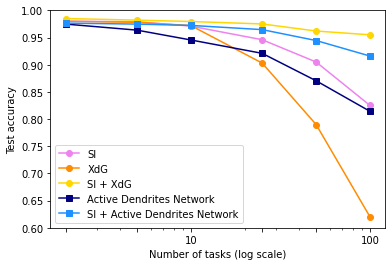

In [2]:
"""
Accuracy curves for SI, XdG, and Active Dendrites Networks on permutedMNIST.
"""

# Synaptic Intelligence
si = [0.9800, 0.9790, 0.9710, 0.9460, 0.9050, 0.8250]

# XdG-related models
xdg = [0.9800, 0.9780, 0.9720, 0.9030, 0.7900, 0.6200]
si_xdg = [0.9850, 0.982, 0.9795, 0.9750, 0.9620, 0.9550]

# Active Dendrites Networks
si_dendrites = [0.9765124999999999, 0.9746999999999999, 0.972305, 0.9645640000000001,
                0.944486, 0.9159337431192398]

fig, ax = plt.subplots()
ax.plot(num_tasks, si, "-o", c="violet", label="SI")
ax.plot(num_tasks, xdg, "-o", c="darkorange", label="XdG")
ax.plot(num_tasks, si_xdg, "-o", c="gold", label="SI + XdG")
ax.plot(num_tasks, dendrites, "-s", c="navy", label="Active Dendrites Network")
ax.plot(num_tasks, si_dendrites, "-s", c="dodgerblue",
        label="SI + Active Dendrites Network")

ax.set_ylabel("Test accuracy")
ax.set_xlabel("Number of tasks (log scale)")
ax.set_xscale("log")
ax.set_xticks(num_tasks)
ax.set_xticklabels(x_labels)
ax.legend(loc="lower left")

ax.set_ylim([0.60, 1.0])

(0.6, 1.0)

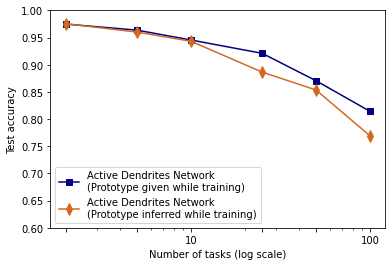

In [3]:
"""
Accuracy curves for Active Dendrites Networks where the prototype context vector is
given while training vs inferred via an online clustering algorithm. (Both methods infer
the prototype at test time.)
"""

prototype_given_while_training = dendrites
prototype_inferred_while_training = [0.9755312500000001, 0.9600425, 0.9431962500000001,
                                     0.8864204999999998, 0.8534172499999999,
                                     0.769117996491909]

fig, ax = plt.subplots()
x = [2, 5, 10, 25, 50, 100]
ax.plot(num_tasks, prototype_given_while_training, "-s", c="navy",
        label="Active Dendrites Network\n(Prototype given while training)")
ax.plot(num_tasks, prototype_inferred_while_training, "-d", c="chocolate", markersize=8,
        label="Active Dendrites Network\n(Prototype inferred while training)")

ax.set_ylabel("Test accuracy")
ax.set_xlabel("Number of tasks (log scale)")
ax.set_xscale("log")
ax.set_xticks(num_tasks)
ax.set_xticklabels(x_labels)
ax.legend(loc="lower left")

ax.set_ylim([0.60, 1.0])

(0.2, 1.0)

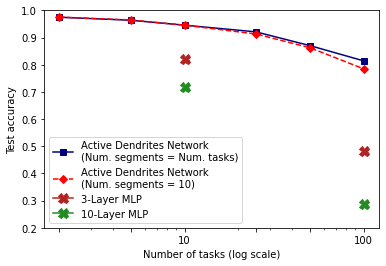

In [4]:
"""
Accuracy curves when comparing with MLPs in a continual learning scenario.
"""

# Active Dendrites Network that has 10 dendritic segments per neuron regardless of the
# number of permutedMNIST tasks to learn in sequence
dendrites_10_segments = [0.9752812499999999, 0.9646975, 0.9455087259411812,
                         0.9131079999999999, 0.8628207499999999, 0.7847466249999999]

# Both 3- and 10-layer MLPs; results are only reported for 10 and 100 tasks
mlp_3_layers = [None, None, 0.8203199999999999, None, None, 0.483134]
mlp_10_layers = [None, None, 0.71843, None, None, 0.28608737500000003]

fig, ax = plt.subplots()
ax.plot(num_tasks, dendrites, "-s", c="navy",
        label="Active Dendrites Network\n(Num. segments = Num. tasks)")
ax.plot(num_tasks, dendrites_10_segments, '--D', c="r",
        label="Active Dendrites Network\n(Num. segments = 10)")

ax.plot(num_tasks, mlp_3_layers, "-X", markersize=10, c="firebrick",
        label="3-Layer MLP")
ax.plot(num_tasks, mlp_10_layers, "-X", markersize=10, c="forestgreen",
        label="10-Layer MLP")

ax.set_ylabel("Test accuracy")
ax.set_xlabel("Number of tasks (log scale)")
ax.set_xscale("log")
ax.set_xticks(num_tasks)
ax.set_xticklabels(x_labels)
ax.legend(loc="lower left")

ax.set_ylim([0.20, 1.0])

(0.5, 1.0)

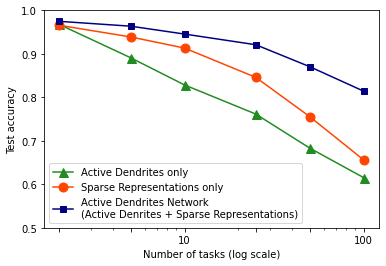

In [5]:
"""
Accuracy curves when comparing an Active Dendrites Network to 1) a network with active
dendrites but ReLU instead of kWTA (i.e., no sparse representations) and 2) an MLP with
kWTA.
"""

dendrites_only = [0.96759375, 0.8911, 0.828535, 0.7615365, 0.68327675, 0.615350125]
sparsity_only = [0.96568125, 0.938915, 0.91333, 0.8459225, 0.75559925, 0.65613125]

fig, ax = plt.subplots()
x = [2, 5, 10, 25, 50, 100]
ax.plot(x, dendrites_only, "-^", markersize=9, label="Active Dendrites only",
        color="forestgreen")
ax.plot(x, sparsity_only, "-o", markersize=9, label="Sparse Representations only",
        color="orangered")
ax.plot(x, dendrites, "-s",
        label="Active Dendrites Network\n(Active Denrites + Sparse Representations)",
        color="navy")

ax.set_ylabel("Test accuracy")
ax.set_xlabel("Number of tasks (log scale)")
ax.set_xscale("log")
ax.set_xticks(num_tasks)
ax.set_xticklabels(x_labels)
ax.legend(loc="lower left")

ax.set_ylim([0.50, 1.0])

(0.35, 1.0)

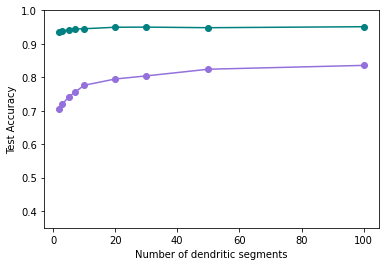

In [6]:
"""
Accuracy curves when varying the number of dendritic segments in an Active Dendrites
Network.
"""

tasks_10 = [0.9358069717884063, 0.9377269804477691, 0.9423299729824066,
            0.9441499829292297, 0.9450679898262024, 0.9495149731636048,
            0.949940973520279, 0.9481599748134613, 0.9510999739170074]
tasks_50 = [0.705278193950653, 0.7200601935386658, 0.7408904075622559,
            0.7553038001060486, 0.7760532021522522, 0.7947914004325867,
            0.8040616035461425, 0.8240365982055664, 0.8355103969573975]
x = [2, 3, 5, 7, 10, 20, 30, 50, 100]

fig, ax = plt.subplots()
ax.plot(x, tasks_10, '-o', color="teal", label="10 Tasks")
ax.plot(x, tasks_50, '-o', color="mediumpurple", label="50 Tasks")

ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Number of dendritic segments")

ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_ylim([0.35, 1.0])

(0.35, 1.0)

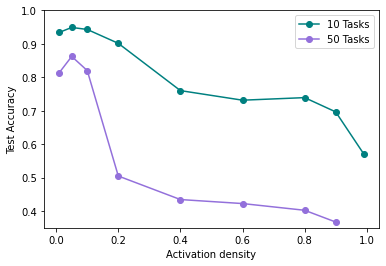

In [7]:
"""
Accuracy curves when varying the activation sparsity in the k-Winner-Take-All function
in each layer of an Active Dendrites Network.
"""

tasks_10 = [0.9341029703617096, 0.9489639699459076, 0.942911970615387,
            0.9013999760150909, 0.7600849807262421, 0.7314529716968536,
            0.7391429722309113, 0.696457976102829, 0.571222984790802]
tasks_50 = [0.8138267993927002, 0.8622976064682006, 0.8199767887592315,
            0.5047854036092758, 0.4344376027584076, 0.42246940433979036,
            0.4023984014987946, 0.36724600195884705, None]
x = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]

fig, ax = plt.subplots()
ax.plot(x, tasks_10, '-o', color="teal", label="10 Tasks")
ax.plot(x, tasks_50, '-o', color="mediumpurple", label="50 Tasks")

ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Activation density")

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.legend(loc="upper right")
ax.set_ylim([0.35, 1.0])

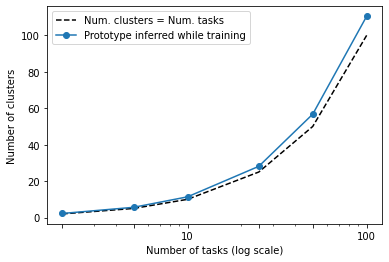

In [8]:
"""
The number of clusters formed when inferring prototype context vectors while training
via a clustering approach. All numbers are the average number of prototypes found over 8
independent trials.
"""

num_clusters_found = [2.25, 5.625, 11.375, 28.125, 56.75, 110.5]

fig, ax = plt.subplots()
ax.plot(num_tasks, num_tasks, "--", color="k", label="Num. clusters = Num. tasks")
ax.plot(num_tasks, num_clusters_found, "-o", label="Prototype inferred while training")

ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of tasks (log scale)")
ax.set_xscale("log")
ax.set_xticks(num_tasks)
ax.set_xticklabels(x_labels)
ax.legend(loc="upper left")